In [1]:
!pip install xgboost

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

## Training Model

In [4]:
def plt_confusion_matrix(cm, normalize=False, labels=None, title='Confusion matrix', cmap=plt.cm.Blues, ax=None):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print()
    if labels is not None:
        d = {index: label for index, label in enumerate(labels)}
        print('Index and Its Corresponding Label:')
        print(d)
        print()
    if ax is None:
        ax = plt.gca()
    sb.heatmap(cm, cmap=cmap, annot=True, fmt='d', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predict')
    ax.set_ylabel('Actual')
    plt.tight_layout()

## XGBoost

#### What is XGBoost

XGBoost is a machine learning algorithm known for its speed and performance in handling structured data.It works by building an ensemble of weak decision trees sequentially, where each subsequent tree corrects the errors of the previous ones. This iterative process allows XGBoost to continuously improve its predictive accuracy. XGBoost is particularly effective for classification problems due to its ability to handle complex relationships in the data, handle missing values, and prevent overfitting.

#### How to optimize its accuracy?

We can try to increase the accuracy score by tuning the hyperparameters.

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:41:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


--------------TEST DATASET---------------
ACCURACY: 0.9021922428330523
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.93       488
      Normal_Weight       0.86      0.90      0.88       615
     Obesity_Type_I       0.89      0.88      0.89       591
    Obesity_Type_II       0.97      0.97      0.97       656
   Obesity_Type_III       1.00      1.00      1.00       794
 Overweight_Level_I       0.83      0.75      0.79       532
Overweight_Level_II       0.77      0.82      0.79       475

           accuracy                           0.90      4151
          macro avg       0.89      0.89      0.89      4151
       weighted avg       0.90      0.90      0.90      4151

Confusion matrix, without normalization



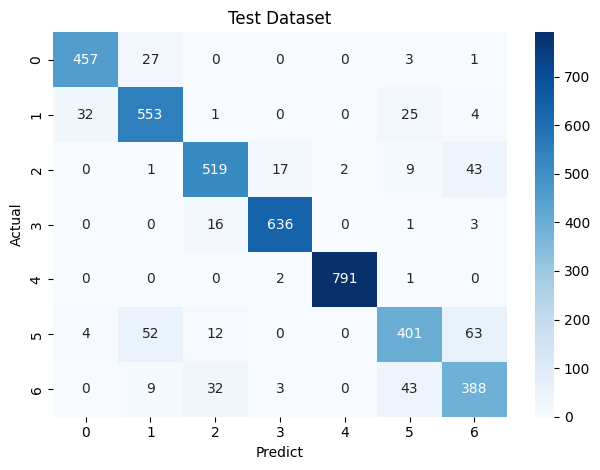

In [8]:
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv")
y_test = pd.read_csv("data/y_test.csv")

label_encoder =  LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1)
# Choose max_depth = 5 because it gives the best accuracy score
xgb.fit(X_train, y_train_encoded)


print('--------------TEST DATASET---------------')

test_pred_index_xg = xgb.predict(X_test)
test_pred_label_xg = label_encoder.inverse_transform(test_pred_index_xg)
print("ACCURACY:", accuracy_score(y_test_encoded, test_pred_index_xg))
print("Classification Report:")
print(classification_report(y_test, test_pred_label_xg))

cm_xg_test = confusion_matrix(y_test, test_pred_label_xg)
plt_confusion_matrix(cm_xg_test, title='Test Dataset')